In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
#import tensorflow as tf
import plotly.express as px

In [3]:
data = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## data split
train , test

In [4]:
px.pie(data , names='stroke' , title = 'stroke distribution' , width=500 , height=300) 

almost 5 % of samples has brain stroke , so our data is imbalanced <br>
so we split with stratified strategy

            df_train >  df
    data >              target
            df_test  >  X_test
                        y_test


In [5]:
# main data splits stratifedly to df_train , df_test 
from sklearn.model_selection import train_test_split
df_train , df_test = train_test_split(data.drop('id' , axis = 1 ) , test_size=0.2 , stratify=data['stroke'] ,random_state=42)
df_train.shape , df_test.shape

((4088, 11), (1022, 11))

## EDA
Exploratory Data Analysis 
- distribution of variables
- visualization 
- descriptive statistics 
- missing values and outliers check
- relation between variables

### distribution

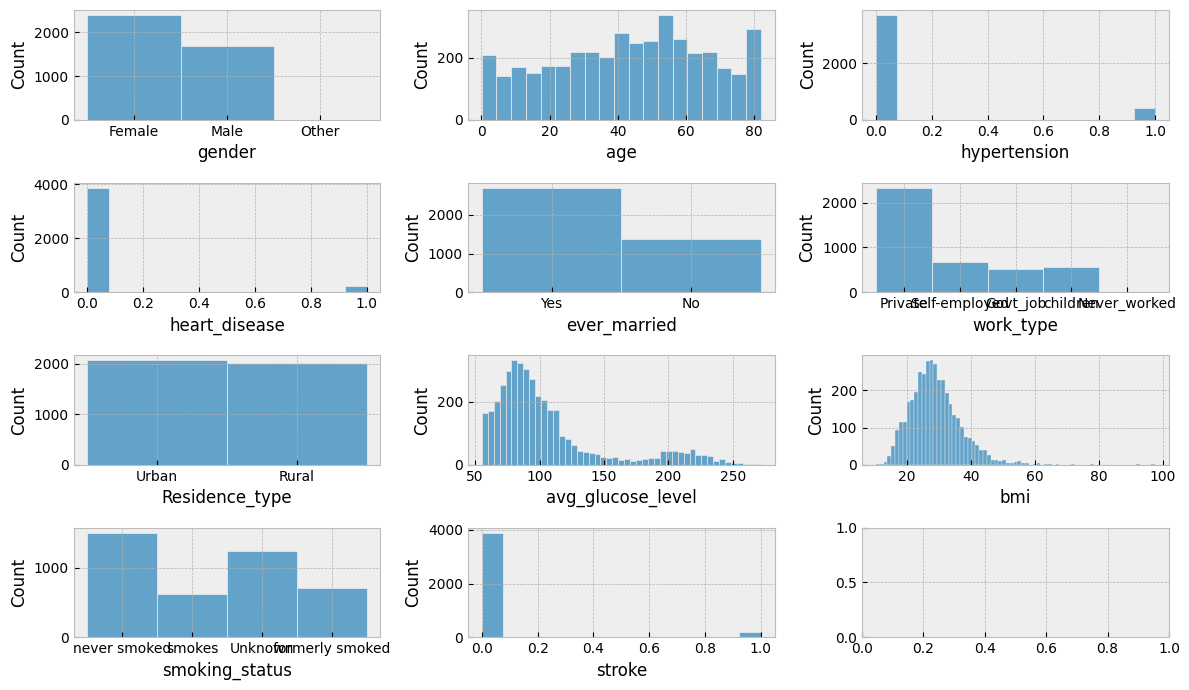

In [7]:
n_row , n_col = 4 , 3 
fig ,ax = plt.subplots(nrows=n_row , ncols=n_col , figsize = (12,7) )
for ax , col in zip(ax.flat , df_train.columns):
    sns.histplot(df_train , ax = ax , x = col)
    plt.tight_layout()

- gender : value count of others must check , it seems very low
- age : check for outliers for higher range
- hypertension , heart disease : check for proportion
- residence type seems eaquall dis
- glucose level and bmi has right tail skewness 

In [ ]:
# custom info statistical training datest

df_info = pd.concat(objs=[df_train.nunique() , df_train.isna().sum() , df_train.dtypes] , axis = 1 )
df_info.columns = ['nunique' , 'missing' , 'dtype']
df_info

,nunique,missing,dtype
gender,3,0,object
age,103,0,float64
hypertension,2,0,int64
heart_disease,2,0,int64
ever_married,2,0,object
work_type,5,0,object
Residence_type,2,0,object
avg_glucose_level,3339,0,float64
bmi,400,170,float64
smoking_status,4,0,object


- multiple object dtype , must encode if they are required
- only bmi has missing value 
- continious features: age , glucose level , bmi
- descrete or categorical : rest of them

### correlation

(Text(0.5, 1.0, 'train data correlation'), None)

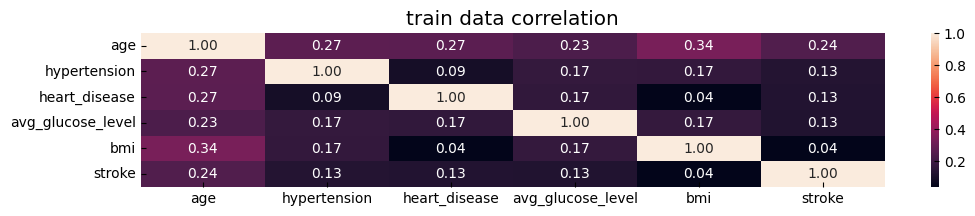

In [8]:
df_corr = df_train.select_dtypes(include=np.number).corr()
df_corr
plt.figure(figsize = (12,2))
sns.heatmap(df_corr ,annot = True , fmt = '0.2f')
plt.title('train data correlation') , plt.grid()

In [11]:
# stroke corrrelation
df_corr['stroke'].sort_values(ascending = False)

stroke               1.000000
age                  0.243404
hypertension         0.133109
heart_disease        0.126883
avg_glucose_level    0.125328
bmi                  0.043810
Name: stroke, dtype: float64

In [12]:
df_corr['bmi'].sort_values(ascending = False)

bmi                  1.000000
age                  0.335785
avg_glucose_level    0.171683
hypertension         0.167559
stroke               0.043810
heart_disease        0.040068
Name: bmi, dtype: float64

### outliers

In [58]:
# based on histogram of gender , we check value of other gender
print(df['gender'].value_counts())
df [df['gender'] == 'Other']

gender
Female    2395
Male      1692
Other        1
Name: count, dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked


In [28]:
# check other catefory for all dataset 
print(data['gender'].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


there is only 1 other category for gender , i decide to replace it with female , probabily, it makes nonusefull complexity

In [78]:
index_other  = df_train [df_train['gender'] == 'Other'].index
df_train.loc[index_other , 'gender'] = 'Female'   # assign female to other category in gender
df_train['gender'].value_counts()

gender
Female    2396
Male      1692
Name: count, dtype: int64

In [79]:
df_train['gender'].value_counts()

gender
Female    2396
Male      1692
Name: count, dtype: int64

<Axes: xlabel='bmi', ylabel='gender'>

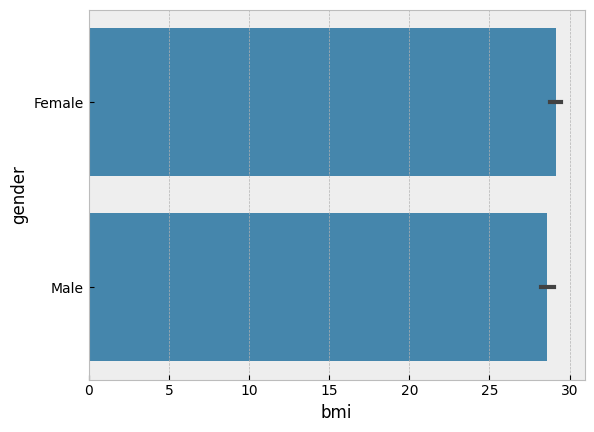

In [82]:
sns.barplot(df_train , x = 'bmi' , y = 'gender')

### missing value 

In [83]:
df_train[df_train.isna().any(axis = 1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2828,Male,29.0,1,0,Yes,Private,Urban,77.55,NaN,formerly smoked,0
1866,Male,10.0,0,0,No,children,Rural,99.87,NaN,formerly smoked,0
3681,Female,16.0,0,0,No,Private,Urban,89.45,NaN,Unknown,0
84,Male,58.0,0,0,Yes,Private,Urban,71.20,NaN,Unknown,1
479,Male,54.0,1,0,Yes,Private,Rural,198.69,NaN,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...
4286,Male,3.0,0,0,No,children,Rural,194.75,NaN,Unknown,0
112,Female,76.0,0,0,Yes,Self-employed,Urban,106.41,NaN,formerly smoked,1
161,Male,71.0,0,1,Yes,Private,Urban,81.76,NaN,smokes,1
57,Male,78.0,0,0,Yes,Private,Urban,237.75,NaN,formerly smoked,1


In [40]:
df_train.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4088.000000,4088.000000,4088.000000,4088.000000,3918.000000,4088.000000
mean,43.353288,0.097114,0.054061,106.317167,28.922180,0.048679
std,22.596816,0.296148,0.226165,45.259652,7.928378,0.215223
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,26.000000,0.000000,0.000000,77.312500,23.600000,0.000000
50%,45.000000,0.000000,0.000000,91.945000,28.000000,0.000000
75%,61.000000,0.000000,0.000000,114.197500,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


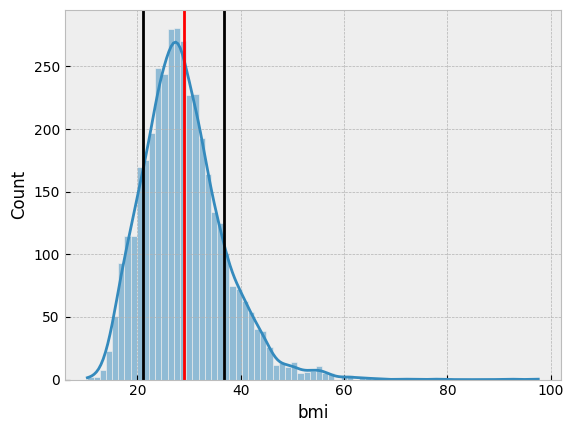

In [48]:
mean_bmi = np.mean(df['bmi'])
std_bmi = np.std(df['bmi'])
sns.histplot(df , x = 'bmi' ,kde = True)
plt.axvline( mean_bmi , color = 'red')
plt.axvline( mean_bmi + std_bmi , color = 'black')
plt.axvline( mean_bmi - std_bmi, color = 'black')

Text(0.5, 1.0, 'bmi distribution')

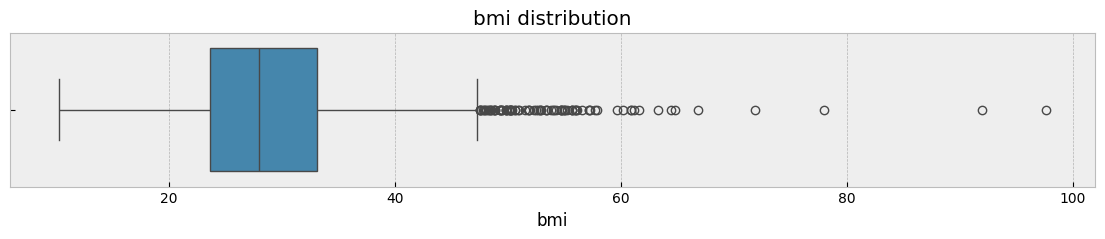

In [62]:
plt.figure(figsize = (14,2))
sns.boxplot(df , x = 'bmi')
plt.title( 'bmi distribution')

In [ ]:
from scipy import 

## preprocessing (ETL)
- data cleaning 
    - missing values handeling , imputation , remove
    - outliers handling
    - drop irrelavent features
    - fix inconsistancies
- data basic transformation
    - encoding categorical features
    - scaling ( standardalization , normalization )

In [ ]:
df = df_train.drop('stroke' , axis = 1)     # X_train
target = df_train['stroke']                 # y_train

X_test = df_test.drop('stroke', axis = 1)
y_test = df_test['stroke']

## feature engineering
enhance dataset , iterative with modeling
- create new feature
- feature advanced transformation (non linear ,  log transform , skwed data)
- reduce dimensianlity ( PCA , t-sne)